#  Snell-Descartes Law

$$n_1 \sin(\Theta_1) = n_2 \sin(\Theta_2)$$
 $$ \Theta_1 = \arcsin\left(\frac{n_2 \sin(\Theta_2)}{n_1}\right)$$

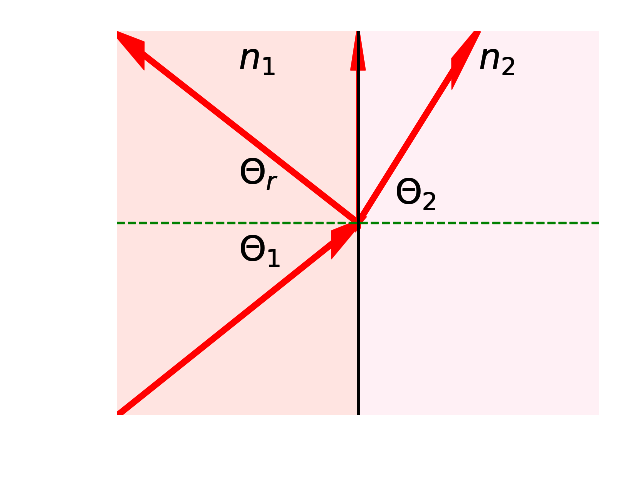

In [6]:
from IPython.display import Image
i = Image(filename='FigSketchSnell.png')
display(i)

# Critical angle
$$\theta_2 = 90^ \circ$$

$$\theta_b =\arcsin\left(\frac{n_2 \sin(90)}{n_1}\right) $$
$$\theta_b =\arcsin\left(\frac{n_2}{n_1}\right) $$

/home/jisha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


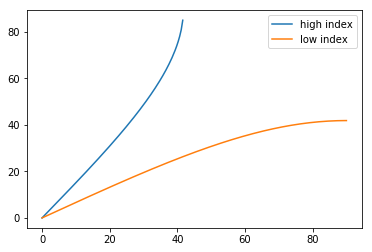

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# define the refractive index of the materials

ref_n1 = 1.5
ref_n2 = 1

critical_angle= np.arcsin(ref_n2/ref_n1)*180/np.pi

input_angle= np.linspace(0,90,200)*np.pi/180

#input_angleb= np.linspace(0,Brewster_angle,200)*np.pi/180
refr_angle = np.arcsin(ref_n1*np.sin(input_angle)/ref_n2)

refr_angle2 = np.arcsin(ref_n2*np.sin(input_angle)/ref_n1)

plt.figure('Refracted angle')
plt.plot(input_angle*180/np.pi, refr_angle*180/np.pi, label='high index')
plt.plot(input_angle*180/np.pi, refr_angle2*180/np.pi, label='low index')
plt.legend()

import warnings
warnings.filterwarnings('ignore')


# writing functions

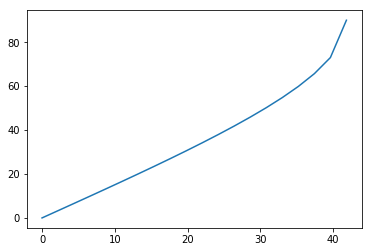

In [2]:
def refracted_angle(refmedium1,refmedium2):
    if refmedium1>refmedium2:
        crit=np.arcsin(refmedium2/refmedium1)
        refhigh=refmedium1
        reflow=refmedium2
        input_angle=np.linspace(0,crit,20)
    else:
        crit=np.arcsin(refmedium1/refmedium2)
        refhigh=refmedium1
        reflow=refmedium2
        input_angle=np.linspace(0,crit,20)
    ref_angle=np.arcsin(refhigh*np.sin(input_angle)/reflow)
    return ref_angle, input_angle, crit

refr_angle, input_angle,brew=refracted_angle(1.5,1)
plt.plot(input_angle*180/np.pi, refr_angle*180/np.pi)

# Scipy and interpolation

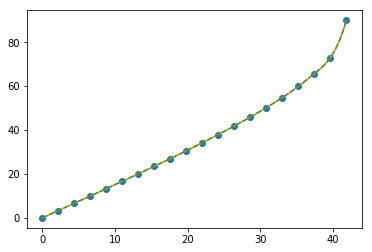

In [33]:
from scipy import interpolate

refr_angle,input_angle,crit=refracted_angle(ref_n1,ref_n2)
fint=interpolate.interp1d(input_angle,refr_angle,kind='cubic')

input_angle_interpolated=np.arange(0,crit,0.001)
ref_interpolated =fint(input_angle_interpolated)

ius = interpolate.InterpolatedUnivariateSpline(input_angle,refr_angle)
fius=ius(input_angle_interpolated)

plt.figure('Interpolated')
plt.plot(input_angle*180/np.pi, refr_angle*180/np.pi,'o',input_angle_interpolated*180/np.pi,ref_interpolated*180/np.pi,
         input_angle_interpolated*180/np.pi,fius*180/np.pi,'--')

In [30]:
input_angle_interpolated.shape


(730,)

# for loop

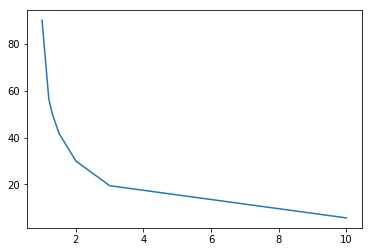

In [36]:
ref_n1 = np.array([1,1.2,1.3,1.5,2,3,10])
ref_n2 = 1

#critical_angle= np.arcsin(ref_n2/ref_n1)*180/np.pi
critical_angle=np.zeros(ref_n1.size)
count=-1
for ref in ref_n1:
    count=count+1
    critical_angle[count]=np.arcsin(ref_n2/ref)*180/np.pi

plt.figure('Critical angle')
plt.plot(ref_n1, critical_angle)